<a href="https://colab.research.google.com/github/Rmkh77/Heart-Diseases-Prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
heart_df=pd.read_csv("heart.csv")

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"nMajorVessels",
    "thal":"Thalium",
    "target":"Status"
}, inplace=True)

In [ ]:
heart_df['nMajorVessels'].unique()

array([2, 0, 1, 3, 4])

In [ ]:
heart_df.drop(["nMajorVessels", "OldPeak"], axis=1, inplace=True)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1025 non-null   int64
 1   Sex                   1025 non-null   int64
 2   ChestPain             1025 non-null   int64
 3   RestingBloodPressure  1025 non-null   int64
 4   Cholesterol           1025 non-null   int64
 5   FastingBloodSugar     1025 non-null   int64
 6   RestingECG            1025 non-null   int64
 7   MaxHeartRate          1025 non-null   int64
 8   ExcerciseAngina       1025 non-null   int64
 9   STSlope               1025 non-null   int64
 10  Thalium               1025 non-null   int64
 11  Status                1025 non-null   int64
dtypes: int64(12)
memory usage: 96.2 KB


In [ ]:
heart_df['Status'].unique()

array([0, 1])

In [ ]:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
   "ExcerciseAngina": { # Corrected the spelling of the key
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [ ]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    heart_df[feature] = heart_df[feature].map(lambda x: map_values(x, mapping))
    heart_df[feature] = heart_df[feature].astype(object)

In [ ]:
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,STSlope,Thalium,Status
0,52,1,0,125,212,0,1,168,0,2,3,0
1,53,1,0,140,203,1,0,155,1,0,3,0
2,70,1,0,145,174,0,1,125,1,0,3,0
3,61,1,0,148,203,0,1,161,0,2,3,0
4,62,0,0,138,294,1,1,106,0,1,2,0


In [ ]:
import matplotlib.pyplot as plt # used in plotting graphs
import seaborn as sns # used to draw heat map

boxplot for :Age


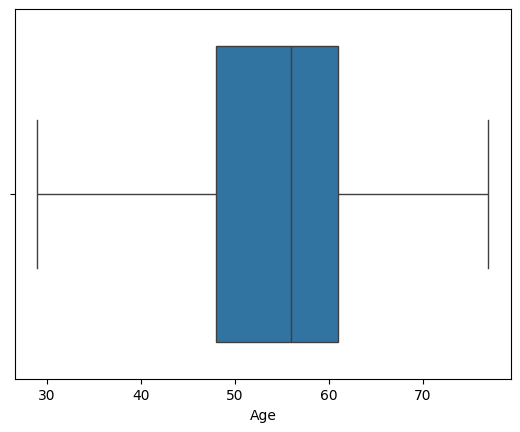

boxplot for :Sex


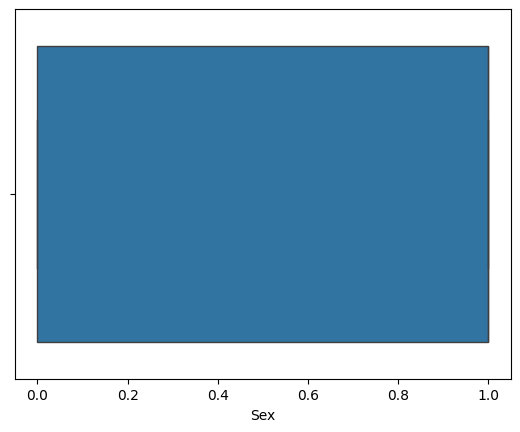

boxplot for :ChestPain


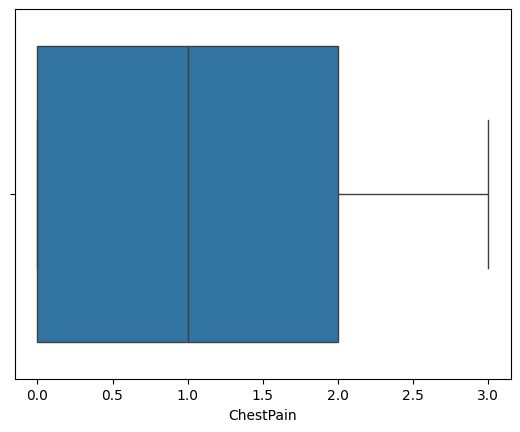

boxplot for :RestingBloodPressure


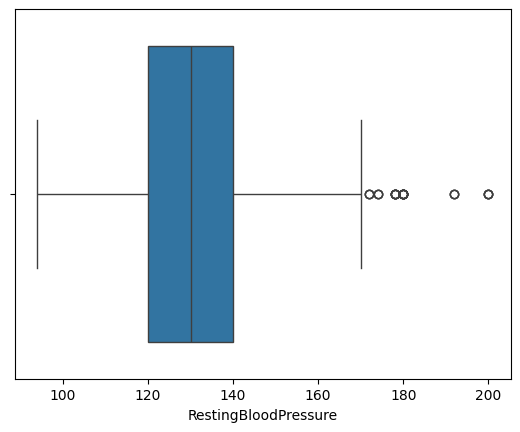

boxplot for :Cholesterol


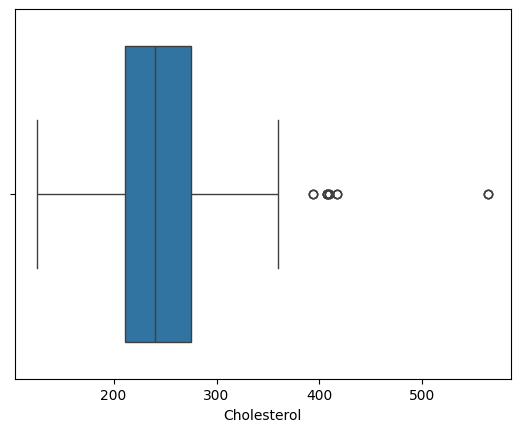

boxplot for :FastingBloodSugar


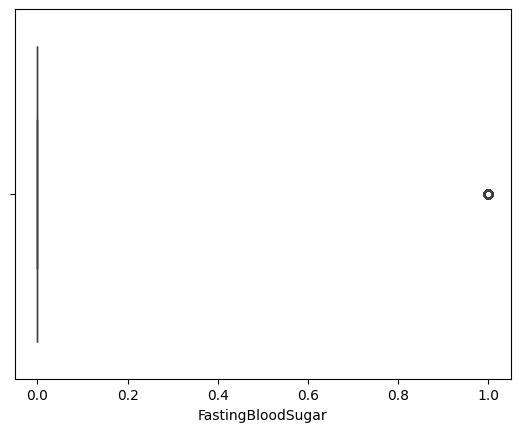

boxplot for :RestingECG


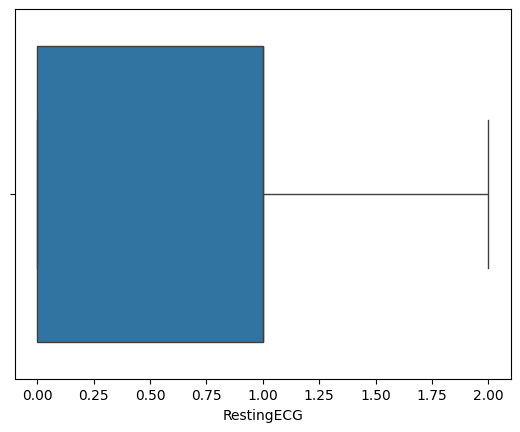

boxplot for :MaxHeartRate


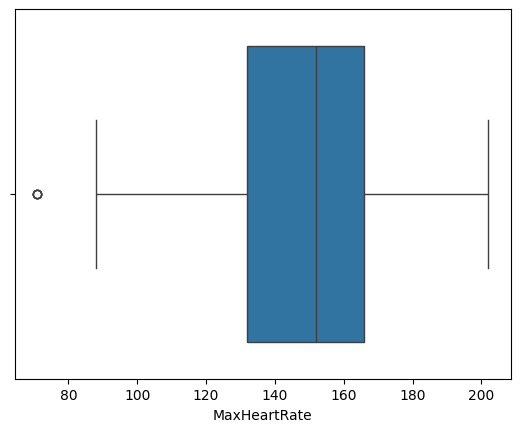

boxplot for :ExcerciseAngina


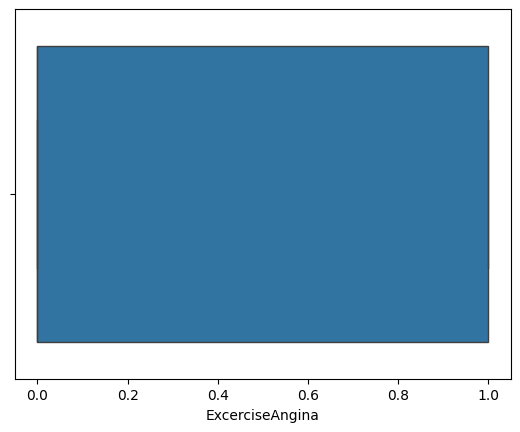

boxplot for :STSlope


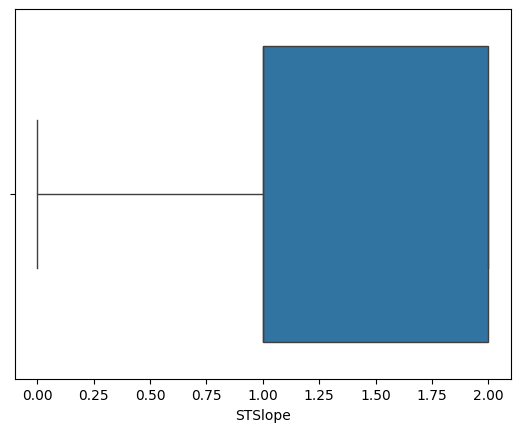

boxplot for :Thalium


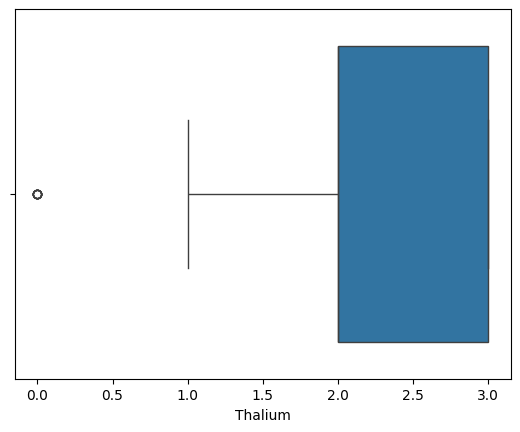

boxplot for :Status


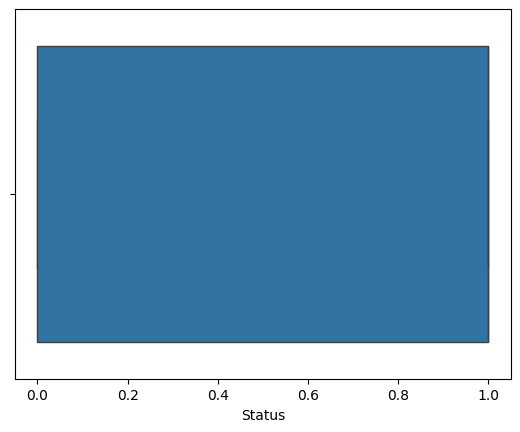

In [ ]:
num_types=heart_df.select_dtypes(include=['int64','float64'])
# grouping all numerical columns into num_types
# plotting box plots for numerical columns to know about outliers
for i in num_types:
  sns.boxplot(x=num_types[i])
  print("boxplot for :"+i)
  plt.show()

In [ ]:
# checking for outlier columns and printing them
for i in num_types:
    Q1=num_types[i].quantile(0.25)
    Q3=num_types[i].quantile(0.75)
    IQR=Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR

    if (num_types[(num_types[i]>upper_bound)]).any(axis=None):
        print(i,":-Outlier Exist")
    elif (num_types[(num_types[i]<lower_bound)]).any(axis=None):
        print(i,":-Outlier Exist")

RestingBloodPressure :-Outlier Exist
Cholesterol :-Outlier Exist
FastingBloodSugar :-Outlier Exist
MaxHeartRate :-Outlier Exist
Thalium :-Outlier Exist


In [ ]:
# removing rows from duration columns that are outliers
Q1=num_types["RestingBloodPressure"].quantile(0.25)
Q3=num_types["RestingBloodPressure"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["RestingBloodPressure"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["RestingBloodPressure"]=new

In [ ]:
# removing rows from duration columns that are outliers
Q1=num_types["Cholesterol"].quantile(0.25)
Q3=num_types["Cholesterol"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["Cholesterol"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["Cholesterol"]=new

In [ ]:
# removing rows from duration columns that are outliers
Q1=num_types["MaxHeartRate"].quantile(0.25)
Q3=num_types["MaxHeartRate"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new=[]
for i in num_types["MaxHeartRate"]:
    if  (i>upper_bound):
           new.append(upper_bound)
    elif (i<lower_bound):
        new.append(lower_bound)
    else:
         new.append(i)

num_types["MaxHeartRate"]=new

In [ ]:
# checking for outlier columns and printing them
for i in num_types:
    Q1=num_types[i].quantile(0.25)
    Q3=num_types[i].quantile(0.75)
    IQR=Q3 - Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR

    if (num_types[(num_types[i]>upper_bound)]).any(axis=None):
        print(i,":-Outlier Exist")
    elif (num_types[(num_types[i]<lower_bound)]).any(axis=None):
        print(i,":-Outlier Exist")

FastingBloodSugar :-Outlier Exist
Thalium :-Outlier Exist


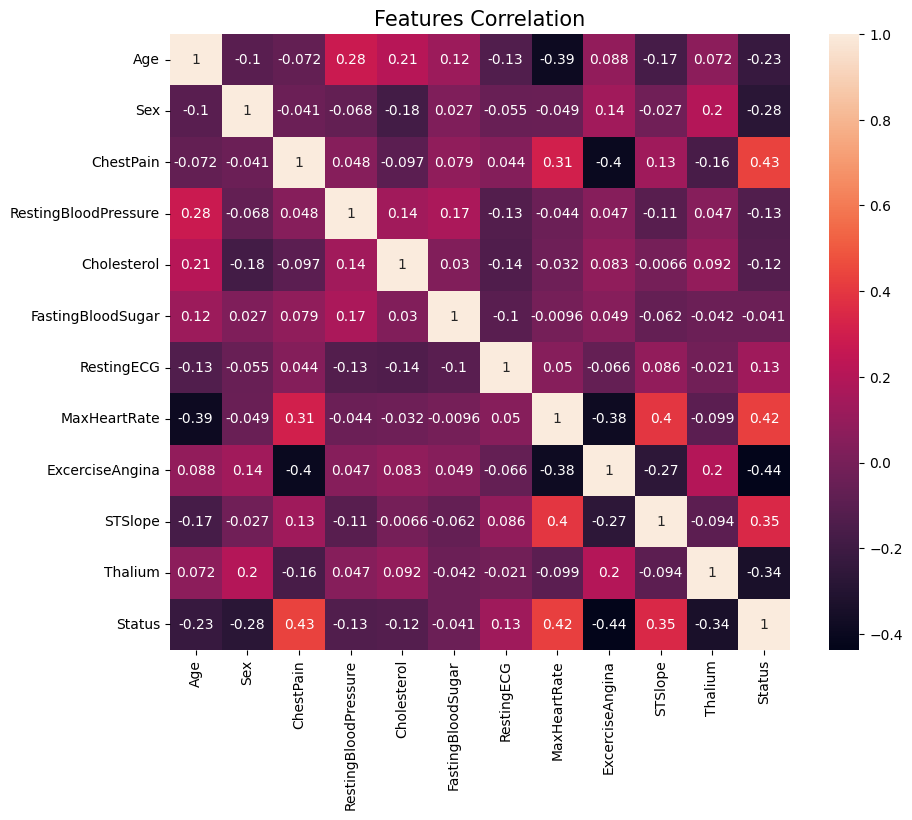

In [ ]:
# plotting heat map for all numerical columns to find corelation
plt.figure(figsize=(10,8))
corr = num_types.corr()
sns.heatmap(corr, annot=True)
plt.title("Features Correlation", fontsize = 15)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

In [ ]:
# label_encoder = LabelEncoder()
# features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']

# for feature in features_to_encode:
#     heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1025 non-null   int64
 1   Sex                   1025 non-null   int64
 2   ChestPain             1025 non-null   int64
 3   RestingBloodPressure  1025 non-null   int64
 4   Cholesterol           1025 non-null   int64
 5   FastingBloodSugar     1025 non-null   int64
 6   RestingECG            1025 non-null   int64
 7   MaxHeartRate          1025 non-null   int64
 8   ExcerciseAngina       1025 non-null   int64
 9   STSlope               1025 non-null   int64
 10  Thalium               1025 non-null   int64
 11  Status                1025 non-null   int64
dtypes: int64(12)
memory usage: 96.2 KB


In [ ]:
features_to_scale = ['RestingBloodPressure', 'Cholesterol', 'MaxHeartRate']

scaler = StandardScaler()
heart_df[features_to_scale] = scaler.fit_transform(heart_df[features_to_scale])

In [ ]:
with open('heart_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
with open('heartmmk.pkl', 'wb') as file:
    pickle.dump(modell, file)

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1025 non-null   int64  
 1   Sex                   1025 non-null   int64  
 2   ChestPain             1025 non-null   int64  
 3   RestingBloodPressure  1025 non-null   float64
 4   Cholesterol           1025 non-null   float64
 5   FastingBloodSugar     1025 non-null   int64  
 6   RestingECG            1025 non-null   int64  
 7   MaxHeartRate          1025 non-null   float64
 8   ExcerciseAngina       1025 non-null   int64  
 9   STSlope               1025 non-null   int64  
 10  Thalium               1025 non-null   int64  
 11  Status                1025 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 96.2 KB


In [ ]:
heart_df['RestingBloodPressure'].unique()

array([-0.37763552,  0.4791073 ,  0.76468824,  0.93603681,  0.36487493,
       -1.80554022, -1.00591359,  1.62143107, -0.66321646, -0.54898408,
       -1.12014597,  0.0221778 , -0.77744884, -0.20628695, -0.43475171,
       -1.4628431 , -1.57707547,  0.19352636, -0.09205458,  0.25064255,
        2.76375483, -0.14917077,  1.05026919,  2.64952245,  0.82180443,
       -0.83456502,  1.16450156,  1.27873394,  2.19259295,  0.13641017,
        2.4210577 ,  0.70757206, -1.34861072, -0.4918679 , -1.23437834,
        0.59333968, -0.32051933,  3.44914909, -0.9487974 , -2.14823735,
        3.90607859,  1.90701201, -1.69130785, -1.51995928,  1.33585013,
        2.30682533,  1.84989582,  1.39296631, -1.74842404])

In [ ]:
# separating target column and other columns
X=heart_df.drop('Status',axis=1)
y=heart_df['Status']

# importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# importing metics module for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X.head(5)

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,STSlope,Thalium
0,52,1,0,-0.377636,-0.659332,0,1,0.821321,0,2,3
1,53,1,0,0.479107,-0.833861,1,0,0.255968,1,0,3
2,70,1,0,0.764688,-1.396233,0,1,-1.048692,1,0,3
3,61,1,0,0.936037,-0.833861,0,1,0.516900,0,2,3
4,62,0,0,0.364875,0.930822,1,1,-1.874977,0,1,2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1025 non-null   int64  
 1   Sex                   1025 non-null   int64  
 2   ChestPain             1025 non-null   int64  
 3   RestingBloodPressure  1025 non-null   float64
 4   Cholesterol           1025 non-null   float64
 5   FastingBloodSugar     1025 non-null   int64  
 6   RestingECG            1025 non-null   int64  
 7   MaxHeartRate          1025 non-null   float64
 8   ExcerciseAngina       1025 non-null   int64  
 9   STSlope               1025 non-null   int64  
 10  Thalium               1025 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 88.2 KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [ ]:
# declaring list to store names and accuracy
alg_names=[]
alg_values=[]

In [ ]:
# evaluation measures
def print_scores(alg, y_true, y_pred):
  print(alg)
  alg_names.append(alg)
  acc_score = accuracy_score(y_true, y_pred)
  alg_values.append(acc_score)
  print("accuracy: ",acc_score)
  pre_score = precision_score(y_true, y_pred)
  print("precision: ",pre_score)
  rec_score = recall_score(y_true, y_pred)
  print("recall: ",rec_score)
  f_score = f1_score(y_true, y_pred, average='weighted')
  print("f1_score: ",f_score)


In [ ]:
# defining a method in which fitting and predicting is done

def modeling(alg, alg_name, params={}):
    model = alg(**params)
    model.fit(X_train, y_train) # fitting model
    y_pred = model.predict(X_test) # predicting model
    print_scores(alg_name, y_test, y_pred) # calling printing() to print performance
    return model

In [ ]:
# decision tree classification
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
dt_model

Decision Tree Classification
accuracy:  0.9902597402597403
precision:  1.0
recall:  0.9821428571428571
f1_score:  0.9902674920342762


DecisionTreeClassifier()

In [ ]:
# random forest classification
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")
rf_model

Random Forest Classification
accuracy:  0.9902597402597403
precision:  1.0
recall:  0.9821428571428571
f1_score:  0.9902674920342762


RandomForestClassifier()

In [ ]:
# navie bayes classification
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
nb_model

Naive Bayes Classification
accuracy:  0.8084415584415584
precision:  0.8303030303030303
recall:  0.8154761904761905
f1_score:  0.8085940100074376


GaussianNB()

In [ ]:
# gradient boosting
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
gd_clf = GradientBoostingClassifier()

gd_clf.fit(X_train, y_train)# fitting model

gd_pred = gd_clf.predict(X_test)# predicting model

print_scores('Gradient Boosting', y_test, gd_pred)# calling printing() to print performance


Gradient Boosting
accuracy:  0.948051948051948
precision:  0.9691358024691358
recall:  0.9345238095238095
f1_score:  0.9481246026700573


In [ ]:
# KNN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train, y_train)# fitting model

gd_pred = knn_clf.predict(X_test)# predicting model

print_scores('KNN', y_test, gd_pred)# calling printing() to print performance

KNN
accuracy:  0.8506493506493507
precision:  0.8505747126436781
recall:  0.8809523809523809
f1_score:  0.8503242179769264


In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier
gd_clf = MLPClassifier()
gd_clf.fit(X_train, y_train)# fitting model

gd_pred = gd_clf.predict(X_test)# predicting model

print_scores('Neural network', y_test, gd_pred)# calling printing() to print performance

Neural network
accuracy:  0.8181818181818182
precision:  0.8181818181818182
recall:  0.8571428571428571
f1_score:  0.817622186295237


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
alg_names

['Decision Tree Classification',
 'Random Forest Classification',
 'Naive Bayes Classification',
 'Gradient Boosting',
 'KNN',
 'Neural network']

In [ ]:
alg_values

[0.9902597402597403,
 0.9902597402597403,
 0.8084415584415584,
 0.948051948051948,
 0.8506493506493507,
 0.8181818181818182]

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Decision Tree Classification'),
  Text(1, 0, 'Random Forest Classification'),
  Text(2, 0, 'Naive Bayes Classification'),
  Text(3, 0, 'Gradient Boosting'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Neural network')])

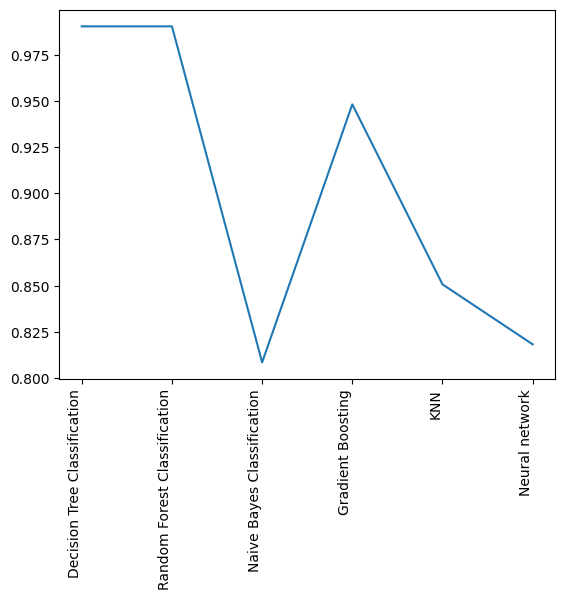

In [ ]:
# plotting line graph that shows accuracy of all model used
plt.plot(alg_names,alg_values)
plt.xticks(rotation=90,ha='right')

this shows the accuracy graph of different algorithms from which we can conclude that gradient boosting has best and hightest accuracy

In [ ]:
modell = RandomForestClassifier()
modell.fit(X_train, y_train) # fitting model
y_predd = modell.predict(X_test) # predicting model


In [ ]:
print_scores('random forest', y_test, y_predd)# calling printing() to print performance


random forest
accuracy:  0.9902597402597403
precision:  1.0
recall:  0.9821428571428571
f1_score:  0.9902674920342762


In [ ]:
import pickle

In [ ]:
with open('heartmmk.pkl', 'wb') as file:
    pickle.dump(modell, file)